In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

In [6]:
aed_to_usd_df = pd.read_csv('Datasets\\Currency Strength\\AED-USD.csv')

## Data Understanding

In [7]:
aed_to_usd_df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Date,Return
0,0,0.272331,0.272368,0.272331,0.272368,0.272368,0,2003-12-01,NaN
1,1,0.272413,0.272420,0.272331,0.272368,0.272368,0,2003-12-02,0.000000
2,2,0.272339,0.272368,0.272331,0.272368,0.272368,0,2003-12-03,0.000000
3,3,0.272346,0.272368,0.272331,0.272368,0.272368,0,2003-12-04,0.000000
4,4,0.272339,0.272346,0.272331,0.272346,0.272346,0,2003-12-05,-0.008174


In [8]:
aed_to_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5468 non-null   int64  
 1   Open        5468 non-null   float64
 2   High        5468 non-null   float64
 3   Low         5468 non-null   float64
 4   Close       5468 non-null   float64
 5   Adj Close   5468 non-null   float64
 6   Volume      5468 non-null   int64  
 7   Date        5468 non-null   object 
 8   Return      5467 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 384.6+ KB


In [9]:
for column in aed_to_usd_df.columns:
    unique_values = aed_to_usd_df[column].nunique()
    print("{:<30}{}".format(column, unique_values))

Unnamed: 0                    5468
Open                          117
High                          172
Low                           100
Close                         116
Adj Close                     116
Volume                        1
Date                          5468
Return                        624


In [10]:
for column in aed_to_usd_df.columns:
    unique_values = aed_to_usd_df[column].value_counts()
    print("{:<30}{}".format(column, unique_values))

Unnamed: 0                    Unnamed: 0
0       1
3643    1
3651    1
3650    1
3649    1
       ..
1820    1
1819    1
1818    1
1817    1
5467    1
Name: count, Length: 5468, dtype: int64
Open                          Open
0.272331    1396
0.272324    1113
0.272316     727
0.272339     442
0.272405     256
            ... 
0.272316       1
0.272428       1
0.272312       1
0.273973       1
0.272277       1
Name: count, Length: 117, dtype: int64
High                          High
0.272331    1496
0.272339     842
0.272368     496
0.272346     418
0.272324     384
            ... 
0.272576       1
0.272385       1
0.272430       1
0.272427       1
0.272280       1
Name: count, Length: 172, dtype: int64
Low                           Low
0.272264    2859
0.272272     689
0.272324     300
0.272279     204
0.272316     195
            ... 
0.272376       1
0.272363       1
0.272350       1
0.272356       1
0.272591       1
Name: count, Length: 100, dtype: int64
Close                      

In [11]:
aed_to_usd_df.duplicated().sum()

0

In [12]:
aed_to_usd_df.isnull().sum()

Unnamed: 0    0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Date          0
Return        1
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Return'}>, <Axes: >]], dtype=object)

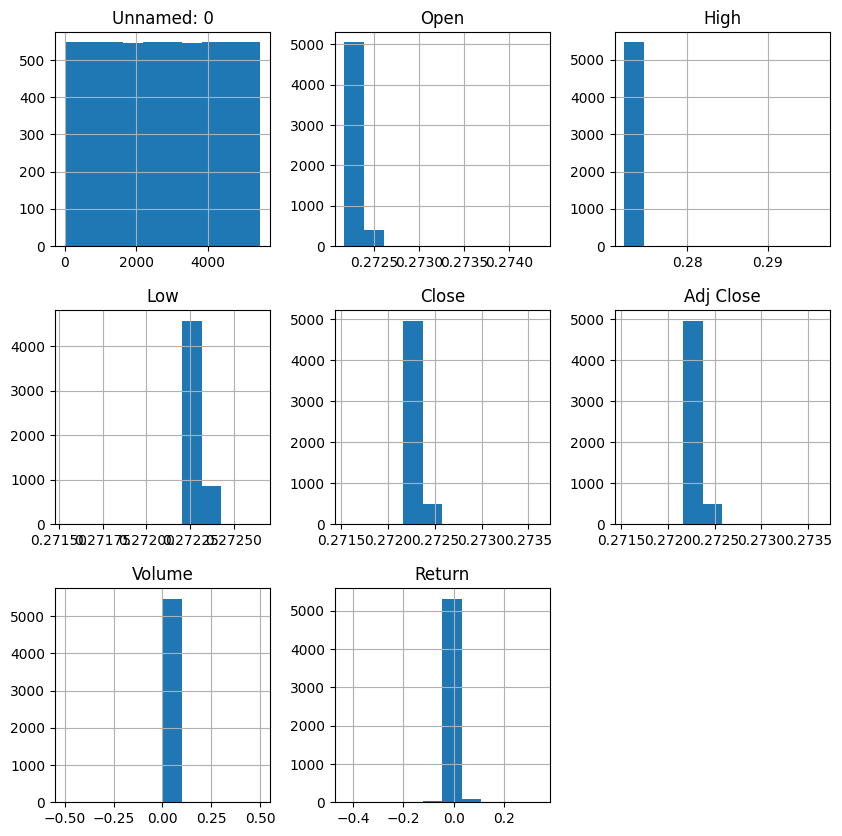

In [13]:
aed_to_usd_df.hist(figsize=(10, 10))

## Data Cleaning

In [14]:
cols_to_drop = [col for col in aed_to_usd_df.columns if aed_to_usd_df[col].nunique() == 1]
aed_to_usd_df = aed_to_usd_df.drop(columns=cols_to_drop)

In [15]:
aed_to_usd_df.drop(columns=['Unnamed: 0'], inplace = True)

In [20]:
# Ensure the date column is in datetime format
aed_to_usd_df['Date'] = pd.to_datetime(aed_to_usd_df['Date'])

# Extract the year from the date column
aed_to_usd_df['Year'] = aed_to_usd_df['Date'].dt.year

aed_to_usd_df.drop('Date', axis=1, inplace=True)

# Group by the year
aed_to_usd_grouped_by_year = aed_to_usd_df.groupby('Year').mean()

,Open,High,Low,Close,Adj Close,Return
Year,,,,,,
2003,0.272344,0.272357,0.272335,0.272354,0.272354,1.586037e-07
2004,0.272335,0.272367,0.272314,0.272353,0.272353,3.237452e-07
2005,0.272300,0.272375,0.272270,0.272345,0.272345,-1.334754e-04
2006,0.272337,0.272377,0.272287,0.272340,0.272340,9.879563e-05
2007,0.272409,0.272444,0.272319,0.272388,0.272388,-1.769392e-05
2008,0.272377,0.272427,0.272296,0.272371,0.272371,1.073926e-04
2009,0.272388,0.272440,0.272299,0.272376,0.272376,-1.689634e-04
2010,0.272333,0.272449,0.272277,0.272293,0.272293,2.534800e-06
2011,0.272330,0.272336,0.272277,0.272282,0.272282,4.397289e-07


In [21]:
aed_to_usd_grouped_by_year.to_csv('Cleaned Datasets\\Currency Strength\\aed_to_usd_annual.csv', index=False)

In [17]:
# aed_to_usd_df.to_csv('Cleaned Datasets\\Currency Strength\\aed_to_usd.csv', index=False)

# Pumping data into Mongodb

In [18]:
# from pymongo import MongoClient
# from dotenv import load_dotenv
# import os

# # Connect to MongoDB
# load_dotenv()

# client = MongoClient(os.environ['MONGODB_URI_1'])  # Uses the connection string from your .env file
# db = client['tourism_db']
    
# # Convert DataFrame to dictionary
# aed_to_usd_df = aed_to_usd_df.to_dict('records')

# # Insert into MongoDB collections
# db['aed_to_usd_df'].insert_many(aed_to_usd_df)

# print("Data pumped into MongoDB successfully!")